<a href="https://colab.research.google.com/github/layanbuirat/ENCS5141-INTELLIGENT-S-ENCO-COMPUTER-ENGINEERING---YSTEMS-LAB---/blob/main/EXPERMENT9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Leyan Burait 1211439
EXPERMENT9

In [ ]:
 !pip install -U datasets transformers[torch] evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from datasets import load_dataset
dataset = load_dataset('MrbBakh/Sentiment140')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
def tokenize(row):
   tokens = word_tokenize(row['text'])
  # to lowercase and remove punctuation
   tokens = [token.lower() for token in tokens if token.isalpha()]
   return {
  'tokens': tokens
   }
dataset = dataset.map(tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(row):
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in row['tokens'] if token not in stop_words]
  return {
  'tokens': tokens
  }
dataset = dataset.map(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
# Task 1
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem(row):
  tokens = [stemmer.stem(token) for token in row['tokens']]
  return {
  'tokens': tokens
  }

In [ ]:
dataset['train']['tokens'][0]

['went', 'park', 'bff', 'wanted', 'get', 'abducted', 'werewolves', 'happen']

In [ ]:
!pip install --force-reinstall numpy==1.23.5

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.6 requires num

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec
word_embedding = Word2Vec(dataset['train']['tokens'], vector_size=100,
min_count=1, window=5, sg=1, hs=0, negative=10)

In [ ]:
word_embedding.save('w2v.model')
word_embedding = Word2Vec.load('w2v.model')

In [ ]:
def filter_tokens(example):
    return {
    'tokens': [token for token in example['tokens'] if token in
    word_embedding.wv]
    }
def mean_vector(example):return {
  'mean': word_embedding.wv[example['tokens']].mean(axis=0)
}
dataset = dataset.map(filter_tokens) \
  .filter(lambda e: len(e['tokens']) > 0) \
  .map(mean_vector)

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/40000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4961 [00:00<?, ? examples/s]

Map:   0%|          | 0/4964 [00:00<?, ? examples/s]

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
X = np.array(dataset['train']['mean'])
y = np.array(dataset['train']['sentiment'])
clf = GaussianNB()
clf.fit(X, y)

GaussianNB()

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix


X = np.array(dataset['train']['mean'])
y = np.array(dataset['train']['sentiment'])
clf = GaussianNB()
clf.fit(X, y)

# --- Task 2: Evaluation ---
# Predict on test set
X_test = np.array(dataset['test']['mean'])
y_test = np.array(dataset['test']['sentiment'])
y_pred = clf.predict(X_test)

# Compute metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6620
Confusion Matrix:
[[2012  556]
 [1122 1274]]


In [ ]:
def vectorize(example):
  return {
  'vectors': word_embedding.wv[example['tokens']]
  }
dataset = dataset.map(vectorize)

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4961 [00:00<?, ? examples/s]

Map:   0%|          | 0/4964 [00:00<?, ? examples/s]

In [ ]:
import torch
import torch.nn as nn
lstm = nn.LSTM(100, 200)
sequence = torch.tensor(dataset['train'][0]['vectors'])
out, _ = lstm(sequence)

In [ ]:
lstm = nn.LSTM(100, 200, 2, batch_first=True)
batch = [torch.tensor(sequence) for sequence in
dataset['train'][0:4]['vectors']]
padded_batch = nn.utils.rnn.pad_sequence(batch)
out, _ = lstm(padded_batch)

In [ ]:
#Task 3


import torch
import torch.nn as nn

lstm = nn.LSTM(100, 200, 2, batch_first=True)
batch = [torch.tensor(sequence) for sequence in dataset['train'][0:4]['vectors']]
padded_batch = nn.utils.rnn.pad_sequence(batch, batch_first=True)  # (batch_size, seq_len, 100)

# Forward pass
out, (hidden, cell) = lstm(padded_batch)  # out shape: (batch_size, seq_len, 200)

# --- SOLUTION: Get last token's output ---
# Method 1: Use the last hidden state (directly from LSTM)
last_hidden = hidden[-1]  # Shape: (batch_size, 200)

# Method 2: Slice the output tensor (alternative)
seq_lengths = [len(seq) for seq in batch]  # Original lengths before padding
last_outputs = out[torch.arange(out.size(0)), [l-1 for l in seq_lengths]]  # Shape: (batch_size, 200)

print("Last hidden states (from LSTM):", last_hidden.shape)
print("Last outputs (sliced):", last_outputs.shape)

Last hidden states (from LSTM): torch.Size([4, 200])
Last outputs (sliced): torch.Size([4, 200])


In [ ]:
def word_to_index(example):
    indices = [word_embedding.wv.key_to_index[token] for token in
    example['tokens']]
    return {
    'indices': indices
    }
dataset = dataset.map(word_to_index)

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4961 [00:00<?, ? examples/s]

Map:   0%|          | 0/4964 [00:00<?, ? examples/s]

In [ ]:
pad_vector = np.zeros(word_embedding.vector_size)
weights = np.vstack([word_embedding.wv.vectors, pad_vector])
vocab_size, embedding_size = weights.shape
pad_idx = vocab_size - 1

In [ ]:
def pad_sequences(batch):
  indices = [torch.tensor(sample, dtype=torch.long) for sample in
   batch['indices']]
  indices = nn.utils.rnn.pad_sequence(indices, batch_first=True,
   padding_value=pad_idx)
  return {
    'indices': indices
  }
dataset = dataset.map(pad_sequences, batched=True,
 batch_size=None).with_format('torch')

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4961 [00:00<?, ? examples/s]

Map:   0%|          | 0/4964 [00:00<?, ? examples/s]

In [ ]:
import torch.nn.functional as F
class SentimentClassifierLSTM(nn.Module):
  def __init__(self, vocab_size, embedding_size, hidden_size,
    num_layers):
    super().__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.embedding = nn.Embedding(vocab_size, embedding_size)
    self.lstm = nn.LSTM(embedding_size, hidden_size, num_layers,
    batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)

  def forward(self, x):
    embeddings = self.embedding(x)
    out, _ = self.lstm(embeddings)
    out = out[:, -1, :]
    out = self.fc(out)
    out = F.sigmoid(out)
    return out.squeeze(1)

In [ ]:
hidden_size = 128
num_layers = 2
model = SentimentClassifierLSTM(vocab_size=vocab_size,
  embedding_size=embedding_size, hidden_size=hidden_size,
  num_layers=num_layers)
model.embedding.weight = nn.Parameter(torch.FloatTensor(weights))
model.embedding.weight.requires_grad = False

In [ ]:
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
batch_size = 2048
def to_dataloader(dataset, split, shuffle):
  dataset = TensorDataset(dataset[split]['indices'],
     dataset[split]['sentiment'])
  return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
train_dataloader = to_dataloader(dataset, 'train', True)
test_dataloader = to_dataloader(dataset, 'test', False)
validation_dataloader = to_dataloader(dataset, 'validation', False)

In [ ]:
def train_one_epoch(dataloader):
  for inputs, labels in dataloader:
    inputs = inputs.to(device)
    labels = labels.to(device).float()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Test Accuracy: 0.4827

Confusion Matrix:
[[   0 2568]
 [   0 2396]]


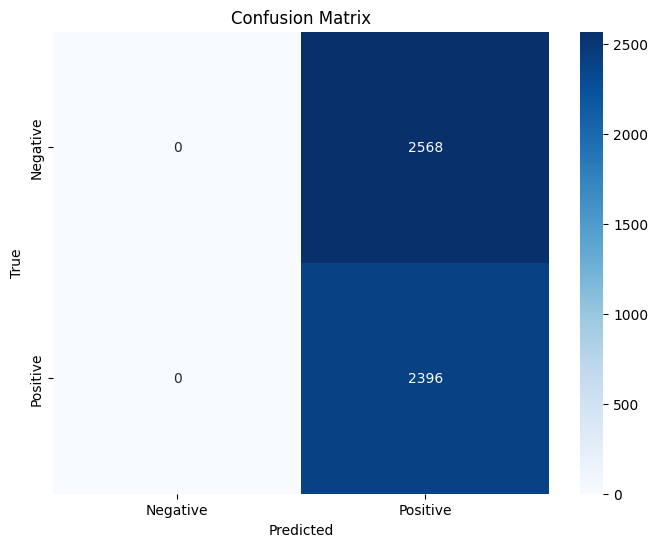

In [ ]:
#Task 5
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            # For binary classification:
            preds = (torch.sigmoid(outputs) > 0.5).float()
            # For multi-class classification use instead:
            # preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_labels), np.array(all_preds)

# Get predictions and true labels
y_true, y_pred = evaluate_model(test_dataloader)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],  # Replace with your class names
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Task 4
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Your existing dataloader setup (unchanged)
batch_size = 2048
def to_dataloader(dataset, split, shuffle):
    dataset = TensorDataset(dataset[split]['indices'],
                          dataset[split]['sentiment'])
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

train_dataloader = to_dataloader(dataset, 'train', True)
test_dataloader = to_dataloader(dataset, 'test', False)
validation_dataloader = to_dataloader(dataset, 'validation', False)

# Training loop with validation
def train_one_epoch(dataloader):
    model.train()
    total_loss = 0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device).float()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate(dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            outputs = model(inputs)
            preds = (torch.sigmoid(outputs) > 0.5).float()  # For binary classification
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# Training for 20 epochs with validation
num_epochs = 20
for epoch in range(num_epochs):
    # Training
    train_loss = train_one_epoch(train_dataloader)

    # Validation
    val_acc = validate(validation_dataloader)

    print(f'Epoch {epoch+1}/{num_epochs} | '
          f'Train Loss: {train_loss:.4f} | '
          f'Val Accuracy: {val_acc:.4f}')

# Final test evaluation (optional)
test_acc = validate(test_dataloader)
print(f'\nFinal Test Accuracy: {test_acc:.4f}')

Epoch 1/20 | Train Loss: 0.6926 | Val Accuracy: 0.4963
Epoch 2/20 | Train Loss: 0.6443 | Val Accuracy: 0.4963
Epoch 3/20 | Train Loss: 0.5942 | Val Accuracy: 0.4963
Epoch 4/20 | Train Loss: 0.5749 | Val Accuracy: 0.4963
Epoch 5/20 | Train Loss: 0.5725 | Val Accuracy: 0.4963
Epoch 6/20 | Train Loss: 0.5657 | Val Accuracy: 0.4963
Epoch 7/20 | Train Loss: 0.5612 | Val Accuracy: 0.4963
Epoch 8/20 | Train Loss: 0.5598 | Val Accuracy: 0.4963
Epoch 9/20 | Train Loss: 0.5566 | Val Accuracy: 0.4963
Epoch 10/20 | Train Loss: 0.5544 | Val Accuracy: 0.4963
Epoch 11/20 | Train Loss: 0.5596 | Val Accuracy: 0.4963
Epoch 12/20 | Train Loss: 0.5525 | Val Accuracy: 0.4963
Epoch 13/20 | Train Loss: 0.5459 | Val Accuracy: 0.4963
Epoch 14/20 | Train Loss: 0.5481 | Val Accuracy: 0.4963
Epoch 15/20 | Train Loss: 0.5470 | Val Accuracy: 0.4963
Epoch 16/20 | Train Loss: 0.5468 | Val Accuracy: 0.4963
Epoch 17/20 | Train Loss: 0.5445 | Val Accuracy: 0.4963
Epoch 18/20 | Train Loss: 0.5400 | Val Accuracy: 0.4963
E

In [ ]:
# Task 6
# Assuming you've already run Task 5's evaluation
lstm_accuracy = accuracy_score(y_true, y_pred)
lstm_cm = confusion_matrix(y_true, y_pred)

print(f"LSTM Model - Test Accuracy: {lstm_accuracy:.4f}")
print("LSTM Confusion Matrix:")
print(lstm_cm)

LSTM Model - Test Accuracy: 0.4827
LSTM Confusion Matrix:
[[   0 2568]
 [   0 2396]]


In [ ]:
#Task 6
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare data (using mean vectors from dataset)
X_train = np.array(dataset['train']['mean'])
y_train = np.array(dataset['train']['sentiment'])
X_test = np.array(dataset['test']['mean'])
y_test = np.array(dataset['test']['sentiment'])

# Train and evaluate Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_preds)
nb_cm = confusion_matrix(y_test, nb_preds)

print(f"\nAverage Vector (NB) - Test Accuracy: {nb_accuracy:.4f}")
print("NB Confusion Matrix:")
print(nb_cm)


Average Vector (NB) - Test Accuracy: 0.6620
NB Confusion Matrix:
[[2012  556]
 [1122 1274]]


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('lyeonii/bert-mini')

tokenizer_config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
tokenized_dataset = dataset.map(lambda x: tokenizer(
  x['text'],
  padding=True,
  return_tensors='pt'
), batched=True, batch_size=None).with_format('torch')

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4961 [00:00<?, ? examples/s]

Map:   0%|          | 0/4964 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset = tokenized_dataset.rename_column('sentiment', 'labels')

In [ ]:
!pip install --upgrade numpy
!pip install --force-reinstall transformers

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached huggingface_hub-0.31.1-py3-none-any.whl.metadata (13

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained('lyeonii/bert-mini', num_labels=2)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/44.7M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at lyeonii/bert-mini and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='sentiment-analysis',
    num_train_epochs=3,
    per_device_train_batch_size=512,
    per_device_eval_batch_size=512,
    weight_decay=0.01,
    eval_strategy='epoch',  # Changed from evaluation_strategy
    save_strategy='epoch',
    logging_strategy='epoch',
    logging_dir='./logs'  # Recommended for TensorBoard
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation']
)

trainer.train()

In [ ]:
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import evaluate  # New import for metrics
import matplotlib.pyplot as plt
import seaborn as sns

### Task 7: Compute validation accuracy during training ###

# Load accuracy metric
accuracy_metric = evaluate.load("accuracy")

# Define compute_metrics function for Trainer
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Update Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    compute_metrics=compute_metrics
)

# Train the model (will now show validation accuracy)
trainer.train()

### Task 8: Evaluate on test set ###

# Get predictions
test_predictions = trainer.predict(tokenized_test)
preds = np.argmax(test_predictions.predictions, axis=-1)
labels = test_predictions.label_ids

# Calculate accuracy
test_accuracy = accuracy_score(labels, preds)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Set Confusion Matrix')
plt.show()

### Task 9: Comparison with previous models ###

# Create comparison table
comparison_results = {
    'Model': ['Average Vector (NB)', 'LSTM', 'BERT-mini'],
    'Accuracy': [nb_accuracy, lstm_accuracy, test_accuracy],
    'Parameters': ['N/A', '~200K', '~11M'],  # Example sizes
    'Architecture': ['Bag-of-words', 'Recurrent', 'Transformer']
}

import pandas as pd
comparison_df = pd.DataFrame(comparison_results)
print("\nModel Comparison:")
print(comparison_df.to_markdown(index=False))

# Visualization
plt.figure(figsize=(10,5))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(min(comparison_df['Accuracy'])-0.1, 1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom')
plt.show()